In [83]:
from datasets import list_datasets,load_dataset
from transformers import AutoTokenizer,AutoModel,AutoModelForSequenceClassification

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F

from umap import UMAP
from sklearn.preprocessing import MinMaxScaler
import huggingface_hub

In [87]:
#looking at available datasets in the hub...
all_datasets = list_datasets()
print(f"There are {len(all_datasets)} datasets currently available on the Hub")
print(f"The first 10 are: {all_datasets[:10]}")

C:\Users\Demo\AppData\Local\Temp\ipykernel_1940\1844879057.py:2: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  all_datasets = list_datasets()


There are 61741 datasets currently available on the Hub
The first 10 are: ['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']


In [88]:
#loading emotions dataset using load_dataset object
emotion_dataset = load_dataset("emotion")

In [89]:
print(emotion_dataset)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})


In [91]:
#we can work like a dictonary to divide accordingly
train_ds = emotion_dataset['train']

In [92]:
train_ds[:5]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

In [93]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [95]:
#we can change format of dataset by set_format argument
emotion_dataset.set_format(type="pandas")

In [97]:
df = emotion_dataset['train'][:]
df.head(5)

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [99]:
#converts label integer to text labels....
def label_int2str(row):
    return emotion_dataset['train'].features['label'].int2str(row)

df['label_name'] = df['label'].apply(label_int2str)

In [100]:
df.head(3)

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger


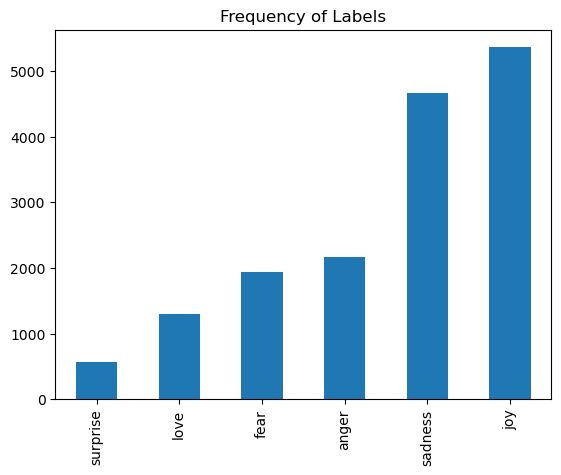

In [101]:
#Distribution of the classes over training dataset....
df['label_name'].value_counts(ascending=True).plot.bar()
plt.title("Frequency of Labels")
plt.show()

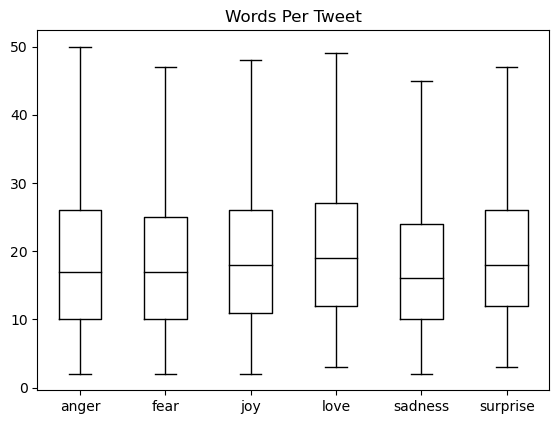

In [102]:
#Tweet Lengths with respect to each class....
df["Words Per Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Tweet", by="label_name", grid=False,
showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [103]:
#we can set and reset the dataset format accordingly....
emotion_dataset.reset_format()

# Character Level Tokenization

In [15]:
#tokenization done at a character level
text = "Tokenizing text is a core task of NLP."
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


In [16]:
#tokenizing the text
token2idx = {ch:idx for idx,ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9, 'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18, 'z': 19}


In [17]:
#getting input_ids for text
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


In [18]:
#input ids are one hot encoded and then they are turned back into embeddings of lower dimensions....
input_ids = torch.tensor(input_ids)
one_hot_encoded = F.one_hot(input_ids,num_classes=len(token2idx))
one_hot_encoded.shape

torch.Size([38, 20])

In [19]:
print(f"Token: {tokenized_text[0]}")
print(f"Tensor index: {input_ids[0]}")
print(f"One-hot: {one_hot_encoded[0]}")

Token: T
Tensor index: 5
One-hot: tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


 Word Tokenization and subword tokenization 
subword tokenization combines best of character tokenization and word tokenization 
wordpiece tokenizer is a example of it i.e. subword tokenization 

# Tokenization 

In [105]:
#initiating a toknizer.....
model_name = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [106]:
#testing it with sample piece of text....
text = 'Tokenizing text is a core part of NLP'
encoded_text = tokenizer(text)

In [107]:
encoded_text

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 2112, 1997, 17953, 2361, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [108]:
#converting ids to tokens
print(tokenizer.convert_ids_to_tokens(encoded_text['input_ids']))

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'part', 'of', 'nl', '##p', '[SEP]']


In [19]:
#converting tokens to string.....
print(tokenizer.convert_tokens_to_string(['token', '##izing', 'text', 'is', 'a', 'core', 'part', 'of', 'nl', '##p']))

tokenizing text is a core part of nlp


In [20]:
tokenizer.vocab_size,tokenizer.model_max_length,tokenizer.model_input_names

(30522, 512, ['input_ids', 'attention_mask'])

## Tokenizing whole dataset

In [110]:
def tokenize(batch):
    '''method to convert Dataset object type dataset into tokens'''
    return tokenizer(batch['text'],padding=True,truncation=True)

In [111]:
tokenize(train_ds[:2])

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [24]:
emotion_encoded = emotion_ds.map(tokenize,batched=True,batch_size=None)
#batch_size=None considers whole dataset as a single batch making all input sizes global length

In [25]:
emotion_encoded['train']

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 16000
})

## Classification model using features using transformer model.....

In [112]:
emotion_dataset = emotion_dataset

In [123]:
#defining tokenizer and model used to build classification model.......

model_name = 'distilbert-base-uncased'

#initialising tokenizer.....
tokenizer = AutoTokenizer.from_pretrained(model_name)
#initialising model......
model = AutoModel.from_pretrained(model_name)


In [115]:
#method to tokenize each dataset using map function on the dataset object.....
def tokenize(batch):
    '''method to convert Dataset object type dataset into tokens'''
    return tokenizer(batch['text'],padding=True,truncation=True)
 

In [119]:
#testing toknizer and feautre extraction on the sample text of data....
text = "this is a test"

test_ip = tokenizer(text,return_tensors='pt')

#if we are using model on cuda/cpu then we hve to move input_ids , attention mask to device accordingly..
# test_ip_ = {k:v.to(device) for k,v in test_ip.items()} device=cuda/cpu

In [121]:
test_ip

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}

In [125]:
#while we are extracting the feature no_grad is used so that only tensors are come with less memory footprit....
with torch.no_grad():
    outputs = model(**test_ip)
    
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]]), hidden_states=None, attentions=None)


In [126]:
outputs.last_hidden_state.shape

torch.Size([1, 6, 768])

In [127]:
outputs.last_hidden_state[:,0].shape

torch.Size([1, 768])

In [128]:
del outputs, test_ip_

In [129]:
# we can extract all the hidden states in dataset with map function on dataset object......
def extract_hidden_states(batch):
    
    #place items to cuda
    inputs = {k:v for k,v in batch.items() if k in tokenizer.model_input_names}
    
    #extracting all the last layer outputs from model.......
    with torch.no_grad():
        output = model(**inputs).last_hidden_state
    
    return {'hidden_state': output[:,0]} #this adds extra dict value to existing dataset object with hidden_state

In [130]:
#tokenizing the dataset.....
emotion_encoded = emotion_dataset.map(tokenize,batched=True,batch_size=None)

#before sending to feature extraction we should need to  change format type for col used by model.....
emotion_encoded.set_format("torch",columns=["input_ids", "attention_mask", "label"])

#calling the extract function for feature extraction and this should be called on the tokenized dataset...
emotions_hidden = emotion_encoded.map(extract_hidden_states,batched=True)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
emotions_hidden['train'].column_names

In [ ]:
#After generating the features of dataset...
#now we are extracting the train and validation dataset training on ML model......
X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])

X_train.shape, X_valid.shape

In [ ]:
#Visualizing feature of each class using UMAP as it projects features to very low dimensional spaces.....
# Scale features to [0,1] range
X_scaled = MinMaxScaler().fit_transform(X_train)

# Initialize and fit UMAP
mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)

# Create a DataFrame of 2D embeddings
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb["label"] = y_train
df_emb.head()

In [ ]:
#plt to show distribution of each class.....
fig, axes = plt.subplots(2, 3, figsize=(7,5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = emotion_ds["train"].features["label"].names
for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f"label == {i}")
    axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,gridsize=20, linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])
plt.tight_layout()
plt.show()

In [ ]:
#building the Logisitc Regression Model for features........

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train,y_train)
lr_clf.score(X_valid,y_valid)

In [ ]:
#Dummy classifier is baseline model building technique where models can be build using 
# different strategies like majority class etc..
from sklearn.dummy import DummyClassifier

dum_clf = DummyClassifier(strategy="most_frequent")
dum_clf.fit(X_train,y_train)
dum_clf.score(X_valid,y_valid)

In [18]:
#method to plot the confusion matrix.....

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()


In [ ]:
#building the confusion matrix for the LR model predictions....
y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

## Fine-Tuning with Huggingface Trainer API

In [3]:
#loading the dataset.....
emtions_ds = load_dataset('emotion')

In [4]:
#initiating a toknizer.....
model_name = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name)

#initiating the model for classification since we are dealing with text classification we use AutoModelForSequenceClasssification 
clf_model = AutoModelForSequenceClassification(model_name)

In [5]:
#method to tokenize each dataset using map function on the dataset object.....
def tokenize(batch):
    '''method to convert Dataset object type dataset into tokens'''
    return tokenizer(batch['text'],padding=True,truncation=True)

In [6]:
#toknizing whole dataset
emotion_encoded = emtions_ds.map(tokinze,batched=True,batch_size=None)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [8]:
#we can pass method to evaluate model with metrics we are interested to caputre during training...
#following method captures F1_Socre and Accurarcy of model...
from sklearn.metrics import f1_score,accuracy_score
def compute_metrics(pred):
    labels = pred.label_ids
    preds  = pred.predictions.argmax(-1)
    f1     = f1_score(labels,preds,average='weighted')
    acc    = accuracy_score(labels,preds)
    return {"accuracy":acc,"f1":f1}  

In [11]:
#instead of writing training loop we have inbuild API that handle training of model....
from transformers import Trainer,TrainingArguments

batch_size = 64
logging_steps = len(emtions_ds['train'])//batch_size

#defining training metrics required for training and hyper-parameters....
train_args = TrainingArguments(output_dir = model_name+'_emotion_ft',
                                num_train_epochs=2,
                                learning_rate=2e-5,
                                per_device_train_batch_size=batch_size,
                                per_device_eval_batch_size=batch_size,
                                weight_decay=0.01,
                                evaluation_strategy="epoch",
                                disable_tqdm=False,
                                logging_steps=logging_steps,
                                log_level="error")
    

In [12]:
#the trainer method is used to encapsulate traing args with model,tokenizer and datasets and start training....
trainer = Trainer(model=f_model,args=train_args,
                 compute_metrics=compute_metrics,
                 train_dataset=emotion_encoded['train'],
                 eval_dataset=emotion_encoded['validation'],
                 tokenizer=tokenizer)

In [13]:
#training of model start....
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.847700,0.326990,0.902500,0.901146
2,0.258500,0.225047,0.923500,0.923415


TrainOutput(global_step=500, training_loss=0.5530635375976563, metrics={'train_runtime': 655.4719, 'train_samples_per_second': 48.82, 'train_steps_per_second': 0.763, 'total_flos': 720342861696000.0, 'train_loss': 0.5530635375976563, 'epoch': 2.0})

In [14]:
#for prediction we have trainer.predict() to get predictions.....
pred_outputs = trainer.predict(emotion_encoded['validation'])

In [15]:
#it has different attraibute that capture prediction metrics and predictions....
pred_outputs.metrics

{'test_loss': 0.22504660487174988,
 'test_accuracy': 0.9235,
 'test_f1': 0.9234149719033905,
 'test_runtime': 16.0595,
 'test_samples_per_second': 124.537,
 'test_steps_per_second': 1.993}

In [16]:
#getting the predictions from raw_prediction using the argmax function
y_preds = np.argmax(pred_outputs.predictions,axis=-1)

In [25]:
#classes that are present in classification....
labels = emotion_encoded['validation'].features['label'].names

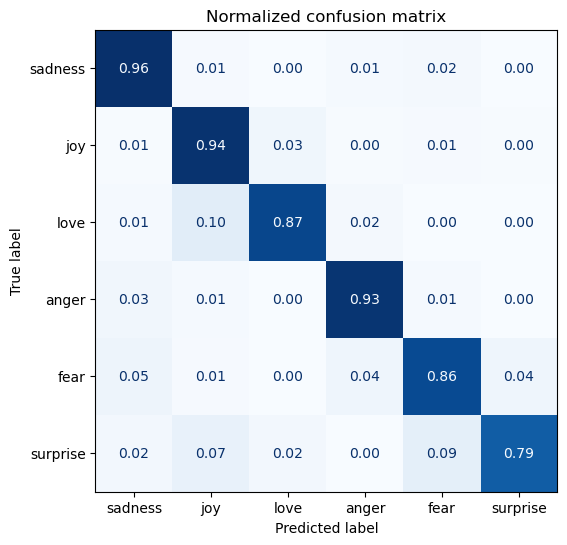

In [26]:
#plotting CM for validation set....
plot_confusion_matrix(y_preds,emotion_encoded['validation']['label'],labels)

## Error Analysis

In [27]:
from torch.nn.functional import cross_entropy

In [55]:
#doing error analysis on model prediction where model failed to get the correct predictions by getting the loss between them..
def forward_pass_with_label(batch):
    '''method adds the loss and predictions to existing dataset object..'''
    
    inputs = {k:v for k,v in batch.items() if k in tokenizer.model_input_names}
    
    with torch.no_grad():
        model = f_model.to('cpu')
        output = model(**inputs)
        pred_label = torch.argmax(output.logits,axis=-1)
        loss = cross_entropy(output.logits,batch['label'],reduction='none')
        
        return {"loss":loss,"predicted_label":pred_label}
        

In [56]:
emotion_encoded.set_format("torch",columns=['input_ids','attention_mask','label'])

In [57]:
emotion_encoded['validation'] = emotion_encoded['validation'].map(forward_pass_with_label,batched=True,batch_size=16)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [62]:
#method to convert integer labels into classes....
def label_int2str(row):
    return emtions_ds['validation'].features['label'].int2str(row)

In [63]:
emotion_encoded.set_format("pandas")
cols = ['text','label','predicted_label','loss']

df_test = emotion_encoded['validation'][:][cols]
df_test['label'] = df_test['label'].apply(label_int2str)
df_test['predicted_label'] = df_test['predicted_label'].apply(label_int2str)

In [65]:
df_test.sort_values("loss",ascending=False).head(4)

,text,label,predicted_label,loss
1801,i feel that he was being overshadowed by the s...,love,sadness,5.756338
882,i feel badly about reneging on my commitment t...,love,sadness,5.715227
1950,i as representative of everything thats wrong ...,surprise,sadness,5.660019
1963,i called myself pro life and voted for perry w...,joy,sadness,5.272655


In [66]:
df_test.sort_values("loss",ascending=True).head(4)

,text,label,predicted_label,loss
578,i got to christmas feeling positive about the ...,joy,joy,0.017439
632,i feel he is an terrific really worth bet,joy,joy,0.018117
856,i feel is more energetic in urban singapore th...,joy,joy,0.018451
1263,i feel this way about blake lively,joy,joy,0.018497


# Pipeline of model

#### After model has trained and saved we can use it in pipeline object for direct utilization by directing model to it path

In [68]:
from transformers import pipeline

In [70]:
#defing model path and getting started with "text-classification" task in pipeline object....
model_id = "D:/AI_ML_Code/NLP_Codes/distilbert-base-uncased_emotion_ft/checkpoint-500"
classifier = pipeline("text-classification",model=model_id)

In [73]:
#prediction on the test......
test_tweet = "I saw a movie today and it was really good"
preds = classifier(test_tweet,top_k=None) #top_k is used to get top k highly probable classes...

In [77]:
preds

[{'label': 'LABEL_1', 'score': 0.9642190933227539},
 {'label': 'LABEL_0', 'score': 0.012037712149322033},
 {'label': 'LABEL_2', 'score': 0.010250387713313103},
 {'label': 'LABEL_5', 'score': 0.006152282934635878},
 {'label': 'LABEL_4', 'score': 0.003751580137759447},
 {'label': 'LABEL_3', 'score': 0.003588981693610549}]

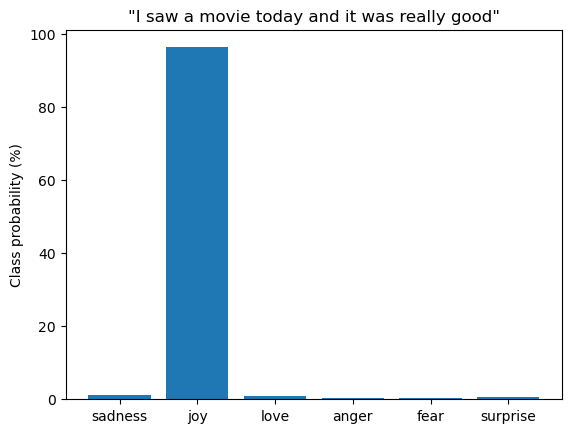

In [82]:
preds_df = pd.DataFrame(preds[:]).sort_values('label')
plt.bar(labels, 100 * preds_df["score"], color='C0')
plt.title(f'"{test_tweet}"')
plt.ylabel("Class probability (%)")
plt.show()

# Batch Normalization

In [131]:
x = np.asarray([[1,3,5,7],
               [3,4,6,2],
               [8,3,2,1]])

In [134]:
mean = x.mean(axis=0) 
std  = x.std(axis=0)

In [137]:
x_ = x-mean/np.sqrt(std)

In [140]:
x_.mean(axis=0),x_.std(axis=0)

(array([ 1.66870642, -1.52158438,  1.00949886,  1.27582572]),
 array([2.94392029, 0.47140452, 1.69967317, 2.62466929]))

# Layer Normalization

In [141]:
import numpy as np

sentence1 = np.array([[0.31,0.14,0.93],[0.14,0.88,0.98]]) # "Popcorn Popped."
sentence2 = np.array([[0.85,0.2,0.14],[0.46,0.61,0.49]]) # "Tea Steeped."

In [142]:
# Average and Variace for First Sentence:
average1 = sentence1.mean()
variance1 = sentence1.var()

# Average and Variance for Second Sentence:
average2 = sentence2.mean()
variance2 = sentence2.var()

In [143]:
# Sentence 1 Normalization:
sentence1_norm = (sentence1 - average1)/(np.sqrt(variance1))
print(f"Sentence1:\n{sentence1}\n\n Sentence1 (Normalized):\n{sentence1_norm}\n")

# Sentence 2 Normalization:
sentence2_norm = (sentence2 - average2)/(np.sqrt(variance2))
print(f"Sentence2:\n{sentence2}\n\n Sentence2 (Normalized):\n{sentence2_norm}")

Sentence1:
[[0.31 0.14 0.93]
 [0.14 0.88 0.98]]

 Sentence1 (Normalized):
[[-0.68074565 -1.1375618   0.98528975]
 [-1.1375618   0.85093206  1.11964744]]

Sentence2:
[[0.85 0.2  0.14]
 [0.46 0.61 0.49]]

 Sentence2 (Normalized):
[[ 1.63221997 -1.07657062 -1.32661282]
 [ 0.00694562  0.63205114  0.13196672]]


In [257]:
import torch

torch1 = torch.from_numpy(sentence1) # "Popcorn Popped."
torch2 = torch.from_numpy(sentence2) # "Tea Steeped."

layer_norm = torch.nn.LayerNorm(torch1.size())

# Sentence 1 Normalization:
torch1_norm = layer_norm(torch1.float())
print(f"Sentence1:\n{torch1}\n\n Sentence1 (Normalized):\n{torch1_norm}\n")

# Sentence 2 Normalization:
torch2_norm = layer_norm(torch2.float())
print(f"Sentence2:\n{torch2}\n\n Sentence2 (Normalized):\n{torch2_norm}")

Sentence1:
tensor([[0.3100, 0.1400, 0.9300],
        [0.1400, 0.8800, 0.9800]], dtype=torch.float64)

 Sentence1 (Normalized):
tensor([[-0.6807, -1.1375,  0.9853],
        [-1.1375,  0.8509,  1.1196]], grad_fn=<NativeLayerNormBackward0>)

Sentence2:
tensor([[0.8500, 0.2000, 0.1400],
        [0.4600, 0.6100, 0.4900]], dtype=torch.float64)

 Sentence2 (Normalized):
tensor([[ 1.6321, -1.0765, -1.3265],
        [ 0.0069,  0.6320,  0.1320]], grad_fn=<NativeLayerNormBackward0>)


In [396]:
#stacking examples on upon other
tr = torch.stack((torch1,torch2))
print(f'Shape of the input matrix{tr.shape}')

ln_norm = layer_norm(tr.float())
print(f'Layer Normalized values:\n {ln_norm}')

Shape of the input matrixtorch.Size([2, 2, 3])
Layer Normalized values:
 tensor([[[-0.6807, -1.1375,  0.9853],
         [-1.1375,  0.8509,  1.1196]],

        [[ 1.6321, -1.0765, -1.3265],
         [ 0.0069,  0.6320,  0.1320]]], grad_fn=<NativeLayerNormBackward0>)


# Batch Normalization

In [633]:
#let us follow up with same example above then we have 2 sentences of sequence length 2 so shape is (2,2,3)
inputs = tr
print(f'Current Input shape : {inputs.shape}')
print(f'Input:\n {inputs}')

#now we are reshaping inputs into (N,C/Features,SeqLen) as batch norm layer follows that pattern
re_inputs = inputs.transpose(2,1)
print(f'reshaped inputs after reshaping : {re_inputs.shape}')
print(f'inputs after reshaping :\n {re_inputs}')

Current Input shape : torch.Size([2, 2, 3])
Input:
 tensor([[[0.3100, 0.1400, 0.9300],
         [0.1400, 0.8800, 0.9800]],

        [[0.8500, 0.2000, 0.1400],
         [0.4600, 0.6100, 0.4900]]], dtype=torch.float64)
reshaped inputs after reshaping : torch.Size([2, 3, 2])
inputs after reshaping :
 tensor([[[0.3100, 0.1400],
         [0.1400, 0.8800],
         [0.9300, 0.9800]],

        [[0.8500, 0.4600],
         [0.2000, 0.6100],
         [0.1400, 0.4900]]], dtype=torch.float64)


In [634]:
#average and variance
in_mean = re_inputs.mean(axis=0)
in_var  = re_inputs.var(axis=0,unbiased=False)

print(f"Mean values across features : \n {in_mean}")
print(f"Variance values across features : \n {in_var}")

Mean values across features : 
 tensor([[0.5800, 0.3000],
        [0.1700, 0.7450],
        [0.5350, 0.7350]], dtype=torch.float64)
Variance values across features : 
 tensor([[0.0729, 0.0256],
        [0.0009, 0.0182],
        [0.1560, 0.0600]], dtype=torch.float64)


In [635]:
#average and variance
in_mean1 = in_mean.mean(axis=1,keepdim=True)
in_var1  = ((re_inputs - in_mean1.mean(1,keepdim=True))**2).mean(0).mean(1,keepdim=True)

print(f"Mean values across features : \n {in_mean1}")
print(f"Variance values across features : \n {in_var1}")

Mean values across features : 
 tensor([[0.4400],
        [0.4575],
        [0.6350]], dtype=torch.float64)
Variance values across features : 
 tensor([[0.0688],
        [0.0922],
        [0.1180]], dtype=torch.float64)


In [636]:
#final batch normalized layers values
bat_norm = (re_inputs - in_mean1)/torch.sqrt(in_var1)
print(f"batch normalized input is : \n {bat_norm}")

batch normalized input is : 
 tensor([[[-0.4954, -1.1433],
         [-1.0455,  1.3913],
         [ 0.8587,  1.0042]],

        [[ 1.5625,  0.0762],
         [-0.8479,  0.5022],
         [-1.4408, -0.4221]]], dtype=torch.float64)


In [637]:
#getting the output by avearaing over multiple axes....
(re_inputs - re_inputs.mean((0,2),keepdim=True)) / torch.sqrt(re_inputs.var((0,2),unbiased=False,keepdim=True))

tensor([[[-0.4954, -1.1433],
         [-1.0455,  1.3913],
         [ 0.8587,  1.0042]],

        [[ 1.5625,  0.0762],
         [-0.8479,  0.5022],
         [-1.4408, -0.4221]]], dtype=torch.float64)

In [638]:
#defining batch normalization layer with number of features......
batch_norm = torch.nn.BatchNorm1d(3)

#batch normalized output...
bat_norm_layer = batch_norm(re_inputs.float())
print(f"batch normalized input is : \n {bat_norm_layer}")

batch normalized input is : 
 tensor([[[-0.4954, -1.1432],
         [-1.0455,  1.3912],
         [ 0.8587,  1.0042]],

        [[ 1.5624,  0.0762],
         [-0.8479,  0.5022],
         [-1.4408, -0.4220]]], grad_fn=<NativeBatchNormBackward0>)


# Calculating variance over  multiple axes

In [583]:
import numpy as np

# Create a 3D matrix
matrix = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])

# Calculate the variance over the first and second axes
variance_axes_1_and_2 = np.var(matrix, axis=(0, 2))

# Print the results
print("Variance over the first and second axes:", variance_axes_1_and_2)

Variance over the first and second axes: [9.66666667 9.66666667]


In [589]:
# the abvoe operation can also be acheived via individual operations.....
mean_axes0 = matrix.mean(axis=0)
print("Mean over the first axes:\n", mean_axes0)

mean_axes1 = mean_axes0.mean(1,keepdims=True)
print("Mean over the second axes on first axes:\n", mean_axes1)


Mean over the first axes:
 [[4. 5. 6.]
 [7. 8. 9.]]
Mean over the second axes on first axes:
 [[5.]
 [8.]]


In [596]:
#varaince over multiple axes formula....
var_ = ((matrix - mean_axes1)**2).mean(0).mean(1)
print("Varaince over the first and second axes:\n", var_)


Varaince over the first and second axes:
 [9.66666667 9.66666667]


# Applying batch and layer normalization on same 2D matrix....


In [622]:
input_matrix = torch.tensor([[1,2,3],
                            [4,5,6],
                            [7,8,9]],dtype=float)


l_norm = torch.nn.LayerNorm(3)
b_norm = torch.nn.BatchNorm1d(3)

In [627]:
#layer normalized output calculated from matrix...
mat_l_norm = (input_matrix - input_matrix.mean(1,keepdim=True)) / torch.sqrt(input_matrix.var(1,keepdim=True,unbiased=False))
print(f"Layer Normalization with mathematic output :\n {mat_l_norm}")

Layer Normalization with mathematic output :
 tensor([[-1.2247,  0.0000,  1.2247],
        [-1.2247,  0.0000,  1.2247],
        [-1.2247,  0.0000,  1.2247]], dtype=torch.float64)


In [626]:
#layer normalized output from layer....
l_norm(input_matrix.float())

tensor([[-1.2247,  0.0000,  1.2247],
        [-1.2247,  0.0000,  1.2247],
        [-1.2247,  0.0000,  1.2247]], grad_fn=<NativeLayerNormBackward0>)

In [613]:
#Bacth Normalizatio we calculate mean by adding up rows and dividing each colum values by #rowsdd
(input_matrix - input_matrix.mean(0))/torch.sqrt(input_matrix.var(0,unbiased=False))

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], dtype=torch.float64)

In [625]:
#batch normalized output from layer......
b_norm(input_matrix.float())

tensor([[-1.2247, -1.2247, -1.2247],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2247,  1.2247,  1.2247]], grad_fn=<NativeBatchNormBackward0>)

In [641]:
### Test data
import pandas as pd
df = pd.DataFrame({'text': ['foo foo foo foo foo foo foo foo', 'bar bar bar bar bar'],
                 'number': [1, 2]})
df.style.set_properties(subset=['text'], **{'width': '300px','height': '100px'})

,text,number
0,foo foo foo foo foo foo foo foo,1
1,bar bar bar bar bar,2


In [642]:
import torch
test_tensor = torch.randn((3,4,5))
v1 = test_tensor.var(dim=[0,2], unbiased=False)[0]  # pick the first coordinate of the result
mean = 0
for i in range(3):
    for j in range(5):
        mean += test_tensor[i, 0, j].item()
mean /= 15
v2 = 0
for i in range(3):
    for j in range(5):
        v2 += (test_tensor[i, 0, j].item() - mean)**2
v2 /= 15
print(v1.item(), v2)

0.6404180526733398 0.6404180765580826


In [644]:
for i in range(3):
    for j in range(5):
        print(test_tensor[i, 0, j])

tensor(-0.3305)
tensor(0.9763)
tensor(-2.0650)
tensor(-0.9852)
tensor(-0.3326)
tensor(-0.4351)
tensor(0.3618)
tensor(-0.1840)
tensor(0.2669)
tensor(1.2400)
tensor(-0.4002)
tensor(-0.0227)
tensor(-0.1419)
tensor(-0.1013)
tensor(-1.3679)


In [650]:
rnn_.weight_hh_l0.shape

torch.Size([1, 1])

In [651]:
help(rnn_)

Help on RNN in module torch.nn.modules.rnn object:

class RNN(RNNBase)
 |  RNN(*args, **kwargs)
 |  
 |  Applies a multi-layer Elman RNN with :math:`\tanh` or :math:`\text{ReLU}` non-linearity to an
 |  input sequence.
 |  
 |  
 |  For each element in the input sequence, each layer computes the following
 |  function:
 |  
 |  .. math::
 |      h_t = \tanh(x_t W_{ih}^T + b_{ih} + h_{t-1}W_{hh}^T + b_{hh})
 |  
 |  where :math:`h_t` is the hidden state at time `t`, :math:`x_t` is
 |  the input at time `t`, and :math:`h_{(t-1)}` is the hidden state of the
 |  previous layer at time `t-1` or the initial hidden state at time `0`.
 |  If :attr:`nonlinearity` is ``'relu'``, then :math:`\text{ReLU}` is used instead of :math:`\tanh`.
 |  
 |  Args:
 |      input_size: The number of expected features in the input `x`
 |      hidden_size: The number of features in the hidden state `h`
 |      num_layers: Number of recurrent layers. E.g., setting ``num_layers=2``
 |          would mean stacking 

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define a simple residual block
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.norm1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1, bias=False)
        self.norm2 = nn.BatchNorm2d(out_channels)
        self.stride = stride

        # If the input and output dimensions don't match, add a 1x1 convolution
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )
        else:
            self.shortcut = nn.Sequential()

    def forward(self, x):
        residual = x

        out = self.conv1(x)
        out = self.norm1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.norm2(out)

        out += self.shortcut(residual)  # Adding the shortcut connection
        out = self.relu(out)

        return out

# Create a simple neural network with a residual block
class ResNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ResNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.norm1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.layer1 = self.make_layer(64, 64, num_blocks=2, stride=1)
        self.layer2 = self.make_layer(64, 128, num_blocks=2, stride=2)
        self.layer3 = self.make_layer(128, 256, num_blocks=2, stride=2)
        self.layer4 = self.make_layer(256, 512, num_blocks=2, stride=2)
        self.avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)

    def make_layer(self, in_channels, out_channels, num_blocks, stride):
        layers = []
        layers.append(ResidualBlock(in_channels, out_channels, stride))
        for _ in range(1, num_blocks):
            layers.append(ResidualBlock(out_channels, out_channels, stride=1))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.norm1(x)
        x = self.relu(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avg_pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

# Instantiate the ResNet model
model = ResNet()

# Create a random input tensor
input_tensor = torch.randn(1, 3, 32, 32)  # (batch_size, num_channels, height, width)

# Forward pass
output = model(input_tensor)

# Backward pass to compute gradients
loss = torch.sum(output)  # Example loss function
loss.backward()

# Gradients for the parameters can be accessed via model parameters:
for name, param in model.named_parameters():
    if param.grad is not None:
        print(f"Gradient for {name}:")
        print(param.grad)


Gradient for conv1.weight:
tensor([[[[ 0.1940, -0.1508,  0.0042],
          [-0.0445,  0.2186,  0.0947],
          [-0.0478,  0.8126, -0.1507]],

         [[-0.0572,  0.0430, -0.1653],
          [ 0.1535,  0.5712,  0.5737],
          [-0.0700, -0.0625, -0.4551]],

         [[-0.0854,  0.8557,  0.0938],
          [ 0.0363,  0.0904,  0.1206],
          [-0.0315,  0.0883, -0.1089]]],


        [[[ 0.2183, -0.2517, -0.2773],
          [-0.3895, -0.5221, -0.4192],
          [ 0.2318, -0.8112,  0.0566]],

         [[ 0.6148, -0.2857, -0.0075],
          [-0.9015,  0.4022,  0.1030],
          [ 0.3806, -0.3457,  0.4914]],

         [[-0.3601, -0.0821,  0.1402],
          [-0.0793,  0.3597, -0.0153],
          [ 0.3947, -0.1202,  0.5051]]],


        [[[-0.2278,  0.8215, -0.9022],
          [-0.4375,  0.2821,  0.3402],
          [ 0.5904, -0.0485,  0.3070]],

         [[ 0.3793, -0.0146, -0.9801],
          [-0.2815, -0.3339,  1.0883],
          [-0.1059, -0.7793, -0.2768]],

         [[-0.362

tensor([-0.0246, -0.0034, -0.0155,  0.0175,  0.0586,  0.0165,  0.0168, -0.0171,
         0.0248,  0.0055,  0.0092, -0.0133,  0.0156, -0.0464, -0.0095, -0.0120,
        -0.0498,  0.0130, -0.0372, -0.0231,  0.0219,  0.0317, -0.0116,  0.0281,
         0.0426,  0.0089, -0.0050, -0.0785, -0.0155,  0.0544, -0.0272,  0.0219,
         0.0560, -0.0414,  0.0434, -0.0402, -0.0180,  0.0477,  0.0233, -0.0090,
        -0.0547, -0.0391, -0.0430,  0.0197, -0.0093,  0.0477, -0.0608, -0.0093,
         0.0423, -0.0329, -0.0388,  0.0050, -0.0238,  0.0201, -0.0158, -0.0440,
        -0.0024, -0.0021,  0.0697, -0.0093,  0.0940, -0.0105, -0.0157,  0.0172,
        -0.0149,  0.0130,  0.0080, -0.0430,  0.0723, -0.0088,  0.0424, -0.0048,
         0.0070,  0.0090, -0.0559, -0.0180, -0.0400,  0.0116,  0.0073, -0.0075,
        -0.0280,  0.0217, -0.0051, -0.0465, -0.0409, -0.0418, -0.0506,  0.0153,
         0.0038, -0.0603,  0.0542,  0.0031, -0.0228, -0.0433,  0.0404, -0.0330,
        -0.0306,  0.0640,  0.0647,  0.03

In [4]:
import torch
import torch.nn as nn

class SimpleNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNet, self).__init__()
        
        # Input Layer
        self.input_layer = nn.Linear(input_size, hidden_size)
        
        # Hidden Layer
        self.hidden_layer = nn.Linear(hidden_size, hidden_size)
        
        # Skip Connection
        self.skip_connection = nn.Identity()  # Identity mapping
        
        # Output Layer
        self.output_layer = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        # Forward pass
        
        # Input Layer
        x_input = self.input_layer(x)
        
        # Hidden Layer
        x_hidden = self.hidden_layer(x_input)
        
        # Skip Connection
        x_skip = self.skip_connection(x_input)  # Identity mapping
        
        # Combine Hidden Layer Output and Skip Connection Output
#         x_combined = x_hidden + x_skip  # Residual connection
        
        # Apply Activation Function (e.g., ReLU)
        x_combined = torch.relu(x_skip)
        
        # Output Layer
        x_output = self.output_layer(x_combined)
        
        return x_output

# Example network with 2 input features, 4 hidden units, and 1 output unit
input_size = 2
hidden_size = 4
output_size = 1

# Create an instance of the network
net = SimpleNet(input_size, hidden_size, output_size)

# Sample input tensor (batch size of 1 and 2 input features)
sample_input = torch.tensor([2.0, 3.0])

# Forward pass to obtain the output
output = net(sample_input)

# Print the output
print("Output:", output)


Output: tensor([-0.0276], grad_fn=<AddBackward0>)


In [8]:
for name , param in net.named_parameters():
    print(name,param)

input_layer.weight Parameter containing:
tensor([[-0.0027, -0.6629],
        [-0.2289, -0.6598],
        [ 0.0102, -0.1350],
        [-0.6924, -0.7064]], requires_grad=True)
input_layer.bias Parameter containing:
tensor([0.5520, 0.1886, 0.3485, 0.1736], requires_grad=True)
hidden_layer.weight Parameter containing:
tensor([[ 0.3314, -0.0601, -0.2322,  0.2847],
        [-0.2038, -0.2777, -0.0528, -0.0239],
        [-0.1964, -0.3639,  0.3963,  0.2717],
        [-0.1706, -0.1071, -0.2087,  0.3690]], requires_grad=True)
hidden_layer.bias Parameter containing:
tensor([-0.4768,  0.0874,  0.2764, -0.0373], requires_grad=True)
output_layer.weight Parameter containing:
tensor([[-0.2453, -0.4177,  0.1424,  0.1436]], requires_grad=True)
output_layer.bias Parameter containing:
tensor([-0.0276], requires_grad=True)


In [9]:
class SingleHiddenLayerWithSkipConnection(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SingleHiddenLayerWithSkipConnection, self).__init__()
        
        # Define the layers
        self.input_layer = nn.Linear(input_size, hidden_size)  # Input layer
        self.hidden_layer = nn.Linear(hidden_size, output_size)  # Hidden layer
        
        self.activation = nn.ReLU()  # Activation function (ReLU in this case)
        
    def forward(self, x):
        # Forward pass
        
        # Input layer
        x_input = self.input_layer(x)
        
        # Apply activation function (ReLU)
        x_hidden = self.activation(x_input)
        
        # Skip connection (identity mapping)
        x_skip = x
        
        # Combine the output of the hidden layer and the skip connection
        x_combined = x_hidden + x_skip  # Residual connection
        
        # Hidden layer
        x_output = self.hidden_layer(x_combined)
        
        return x_output


In [15]:
# Define the dimensions of the neural network
input_size = 5  # Number of input features
hidden_size = 10  # Number of units in the hidden layer
output_size = 3  # Number of output units (e.g., for classification)

# Create an instance of the neural network
model = SingleHiddenLayerWithSkipConnection(input_size, hidden_size, output_size)


In [16]:
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent (SGD) optimizer


In [17]:
# Sample data (for demonstration purposes)
X_train = torch.randn(100, input_size)  # 100 samples, 5 features each
y_train = torch.randint(0, output_size, (100,))  # Random integer labels

# Training loop (for demonstration)
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    
    # Compute the loss
    loss = criterion(outputs, y_train)
    
    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print the loss for monitoring training progress
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')


RuntimeError: The size of tensor a (10) must match the size of tensor b (5) at non-singleton dimension 1

In [13]:
X_train.shape

torch.Size([100, 5])

In [14]:
y_train.shape

torch.Size([100])